<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_1/l1_intro.jpeg?raw=true"> </center>

## Lecture 11 
### Feature Engineering Part II Temporal Data

### Introduction To Unsupervised Machine Learning With Python 


#### Nenad Svrzikapa
#### Harvard University
#### Python for Data Science
#### CSCI E-29

These lectures were prepared by using sources from: 
Andreas C. Muller, Sebastian Raschka, Jake Vanderplas and Sarah Guido

<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_1/2018_e29_staff.jpeg?raw=true"> </center>

## Section
<p class="grey"> 12:00 pm EST via ZOOM </p>
<hr class="red">
* Section will resume this week with Kaleigh
* Introduction to Neural Networks
* Next sections: Phil: Psets 3 and 4 and Joe Pset 5


## Important Dates
<p class="grey"> NOTE: No late credits available for PSET5, EXAM or Graduate Project [No Exceptions]  </p>
- - -
* 4/20/2018 PSET 5 posted
* 4/25/2018 Quiz 4
* 4/29/2018 Problem Set 5 Due - Firm Deadline
* 5/02/2018 No Lecture / Graduate Projects Are Due [CAN NOT BE LATE] - Firm Deadline - Exam 2 posted
* 5/06/2018 Midnight Exam 2 Due -  [CAN NOT BE LATE] Firm Deadline
* 5/09/2018 Best Graduate Projects Movie Night, 7:40 - 8:40, off site meeting with staff.

## Plan
<p class="grey"> Not much time... </p>
<hr class="red">
* Python for network analysis (no time),  but follow my github and you will get this in the next couple of months
* Building workflows with Knime and Python, visualization, SQL and Scikit examples.
* Ensemble example


## Late Work Penalty and Important Information For the Graduate Projects and PSET5
<p class="grey"> Will be reflected in PSET5 grade</p>
<hr class="red">
* You had 5 late days, only 3 could be applied per PSET
* If you ran out or used more than 3 late days on any given pset staff will adjust
* Read the syllabus for more information
* Late days CAN NOT be used for PSET5
* Late submission of the graduate project = 0, we will not accept late graduate project submissions.


### Feature Engineering of Temporal Data
Source: Practical Machine Learning With Python (nicely complements Jake Vanderplas' textbook)


In [400]:
import datetime
from dateutil.parser import parse
import pytz #timezone lib

time_stamps = ['2018-04-18 11:30:00.360000+00:00', '2016-06-13 18:43:15.755000-07:00',
               '2017-01-15 11:30:00.254000+05:30', '2018-12-24 00:30:00.000000+10:00']
df = pd.DataFrame(time_stamps, columns=['time'])
df

,time
0,2018-04-18 11:30:00.360000+00:00
1,2016-06-13 18:43:15.755000-07:00
2,2017-01-15 11:30:00.254000+05:30
3,2018-12-24 00:30:00.000000+10:00


### Creating a timestamp object

In [401]:
ts_objects = np.array([pd.Timestamp(i) for i in np.array(df.time)])
df['timestamp_obj'] = ts_objects
ts_objects

array([Timestamp('2018-04-18 11:30:00.360000+0000', tz='UTC'),
       Timestamp('2016-06-13 18:43:15.755000-0700', tz='pytz.FixedOffset(-420)'),
       Timestamp('2017-01-15 11:30:00.254000+0530', tz='pytz.FixedOffset(330)'),
       Timestamp('2018-12-24 00:30:00+1000', tz='pytz.FixedOffset(600)')],
      dtype=object)

### As easy as accessing the object properties after that

In [402]:
df['year'] = df['timestamp_obj'].apply(lambda x: x.year)
df['month'] = df['timestamp_obj'].apply(lambda x: x.month)
df['day'] = df['timestamp_obj'].apply(lambda x: x.day)
df['day_of_week'] = df['timestamp_obj'].apply(lambda x: x.dayofweek)
df['day_name'] = df['timestamp_obj'].apply(lambda x: x.weekday_name)
df['day_of_year'] = df['timestamp_obj'].apply(lambda x: x.dayofyear)
df['week_of_year'] = df['timestamp_obj'].apply(lambda x: x.weekofyear)
df['quarter'] = df['timestamp_obj'].apply(lambda x: x.quarter)

df

,time,timestamp_obj,year,month,day,day_of_week,day_name,day_of_year,week_of_year,quarter
0,2018-04-18 11:30:00.360000+00:00,2018-04-18 11:30:00.360000+00:00,2018,4,18,2,Wednesday,108,16,2
1,2016-06-13 18:43:15.755000-07:00,2016-06-13 18:43:15.755000-07:00,2016,6,13,0,Monday,165,24,2
2,2017-01-15 11:30:00.254000+05:30,2017-01-15 11:30:00.254000+05:30,2017,1,15,6,Sunday,15,2,1
3,2018-12-24 00:30:00.000000+10:00,2018-12-24 00:30:00+10:00,2018,12,24,0,Monday,358,52,4


### Accessing time

In [403]:
df['hour'] = df['timestamp_obj'].apply(lambda x: x.hour)
df['minute'] = df['timestamp_obj'].apply(lambda x: x.minute)
df['second'] = df['timestamp_obj'].apply(lambda x: x.second)
df[['hour','minute','second']]

,hour,minute,second
0,11,30,0
1,18,43,15
2,11,30,0
3,0,30,0


### Binning by time of day

In [405]:
hr_bins = [-1, 5, 11, 16, 21, 23]
bin_names = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
df['time_category'] = pd.cut(df['hour'], bins=hr_bins, labels=bin_names)
df[['hour', 'time_category']]

,hour,time_category
0,11,Morning
1,18,Evening
2,11,Morning
3,0,Late Night


## Supervised Learning and Unsupervised Learning
<p class="grey"> Does it have a label?  </p>
- - -
### Supervised
* Diagnose a disease based on parameters
* Estimate stock or house market prices
* Ad targeting 
* Spam email categorization
* Flagging fraudulent purchases and fraud detection

### Unsupervised
* Clustering drugs based on RNA sequencing data
* Identify profile groups in social networks based on what they share
* Identify customer groups based on the type of merchandise they purchase
* Categorize documents based on subject matter
* The city of Cambridge wants to place a new emergency care units near accident prone-areas

<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_7/images/Lecture_7_003.jpeg?raw=true"> </center>

<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_7/images/Lecture_7_004.jpeg?raw=true"> </center>

<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_7/images/Lecture_7_006.jpeg?raw=true"> </center>

<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_7/images/Lecture_7_007.jpeg?raw=true"> </center>

## Goal of unsupervised learning
<p class="grey"> Unlike supervised learning we don't aim to find a label  </p>
- - -
* Our goal is to find patterns in data without any human input regarding what these patterns may look like.

<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_7/images/Lecture_7_016.jpeg?raw=true"> </center>

### How many dimensions does the Iris dataset have?

## t-SNE 
### t-distributed stoichiastic neighbor embedding

* Introduced by van der Maaten and Hinton in 2008
* High dimensional data to 2 or 3 dimensional data (thousands of dimensions can be mapped)
* Excellent tool for taking a look at high dimensional data
* Manages to approximately preserve sample distance \*
* You need to get a good sense in order to interpret it
* It's practically lifted from a Hogwarts textbook

http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

## The Goal of the algorithm behind t-SNE 
####  A non-linear algorithm that aims to take data in a high-dimensional space and find a "faithful" representation of that data in a lower-dimensional space (a 2D or 3D plane)

* Tunable parameters (Perplexity [5-50 default 30]  and Learning_Rate [10-1000 default 200]
* Requires intuition
* Read this beautiful article to gain more insight: https://distill.pub/2016/misread-tsne/
* Getting the most from t-SNE may require a lot of tuning
* Doesn't always produce the same results in consequtive runs

Wattenberg, et al., "How to Use t-SNE Effectively", Distill, 2016. http://doi.org/10.23915/distill.00002

## General observations about t-SNE


1. Tuning hyperparameters matters (Learning_Rate, Perplexity, n_iter)
2. Your cluster variance doesn't matter, it has a tendency to expand dense clusters and contract sparse clusters.  If you see one big cluster and one small cluster, don't get too excited because it may not mean anything.  Don't compare your cluster sizes in a t-SNE plot.
3. Distances between cluster may not mean anything
4. Random noise may appear non-random
5. Astonishingly, it can capture data shapes

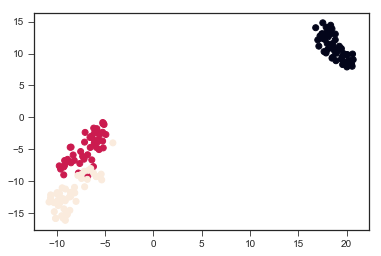

In [311]:
#import TSNE from sklearn manifold
from sklearn.manifold import TSNE

#typically you want to pick a learning rate from 50-200, but you will know if you picked wrong
#try 500, 1, 50, 200 etc
tsne = TSNE(learning_rate = 90)

#fit_transform the data
mapped = tsne.fit_transform(iris.data)

#plot the transformed data colored by target
#what if we didn't color by target?
tsne_x = mapped[:,0]
tsne_y = mapped[:,1]
plt.scatter (tsne_x,tsne_y, c=iris.target)

#yes yours may look different, run it a few times

## Hierarchical Clustering

* Agglomerative clustering :Start with each point as it’s own cluster
* For each cluster, use some criterion to choose another cluster to merge with (i.e. some measure of distance)
* Do this repeatedly until you have only one cluster

(330, 2)


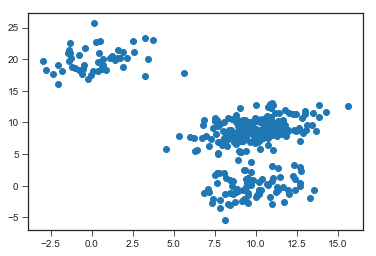

In [364]:
#why? so you can reproduce the data generation (try it without)
np.random.seed(42) 

#np.random.multivariate_normal(mean, covariance,size)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[80,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 9], [[3, 1], [1, 3]], size=[200,])

X = np.concatenate([a,b,c])
print (X.shape)  # 330 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

## Hierarchical Clustering of Generated Clusters

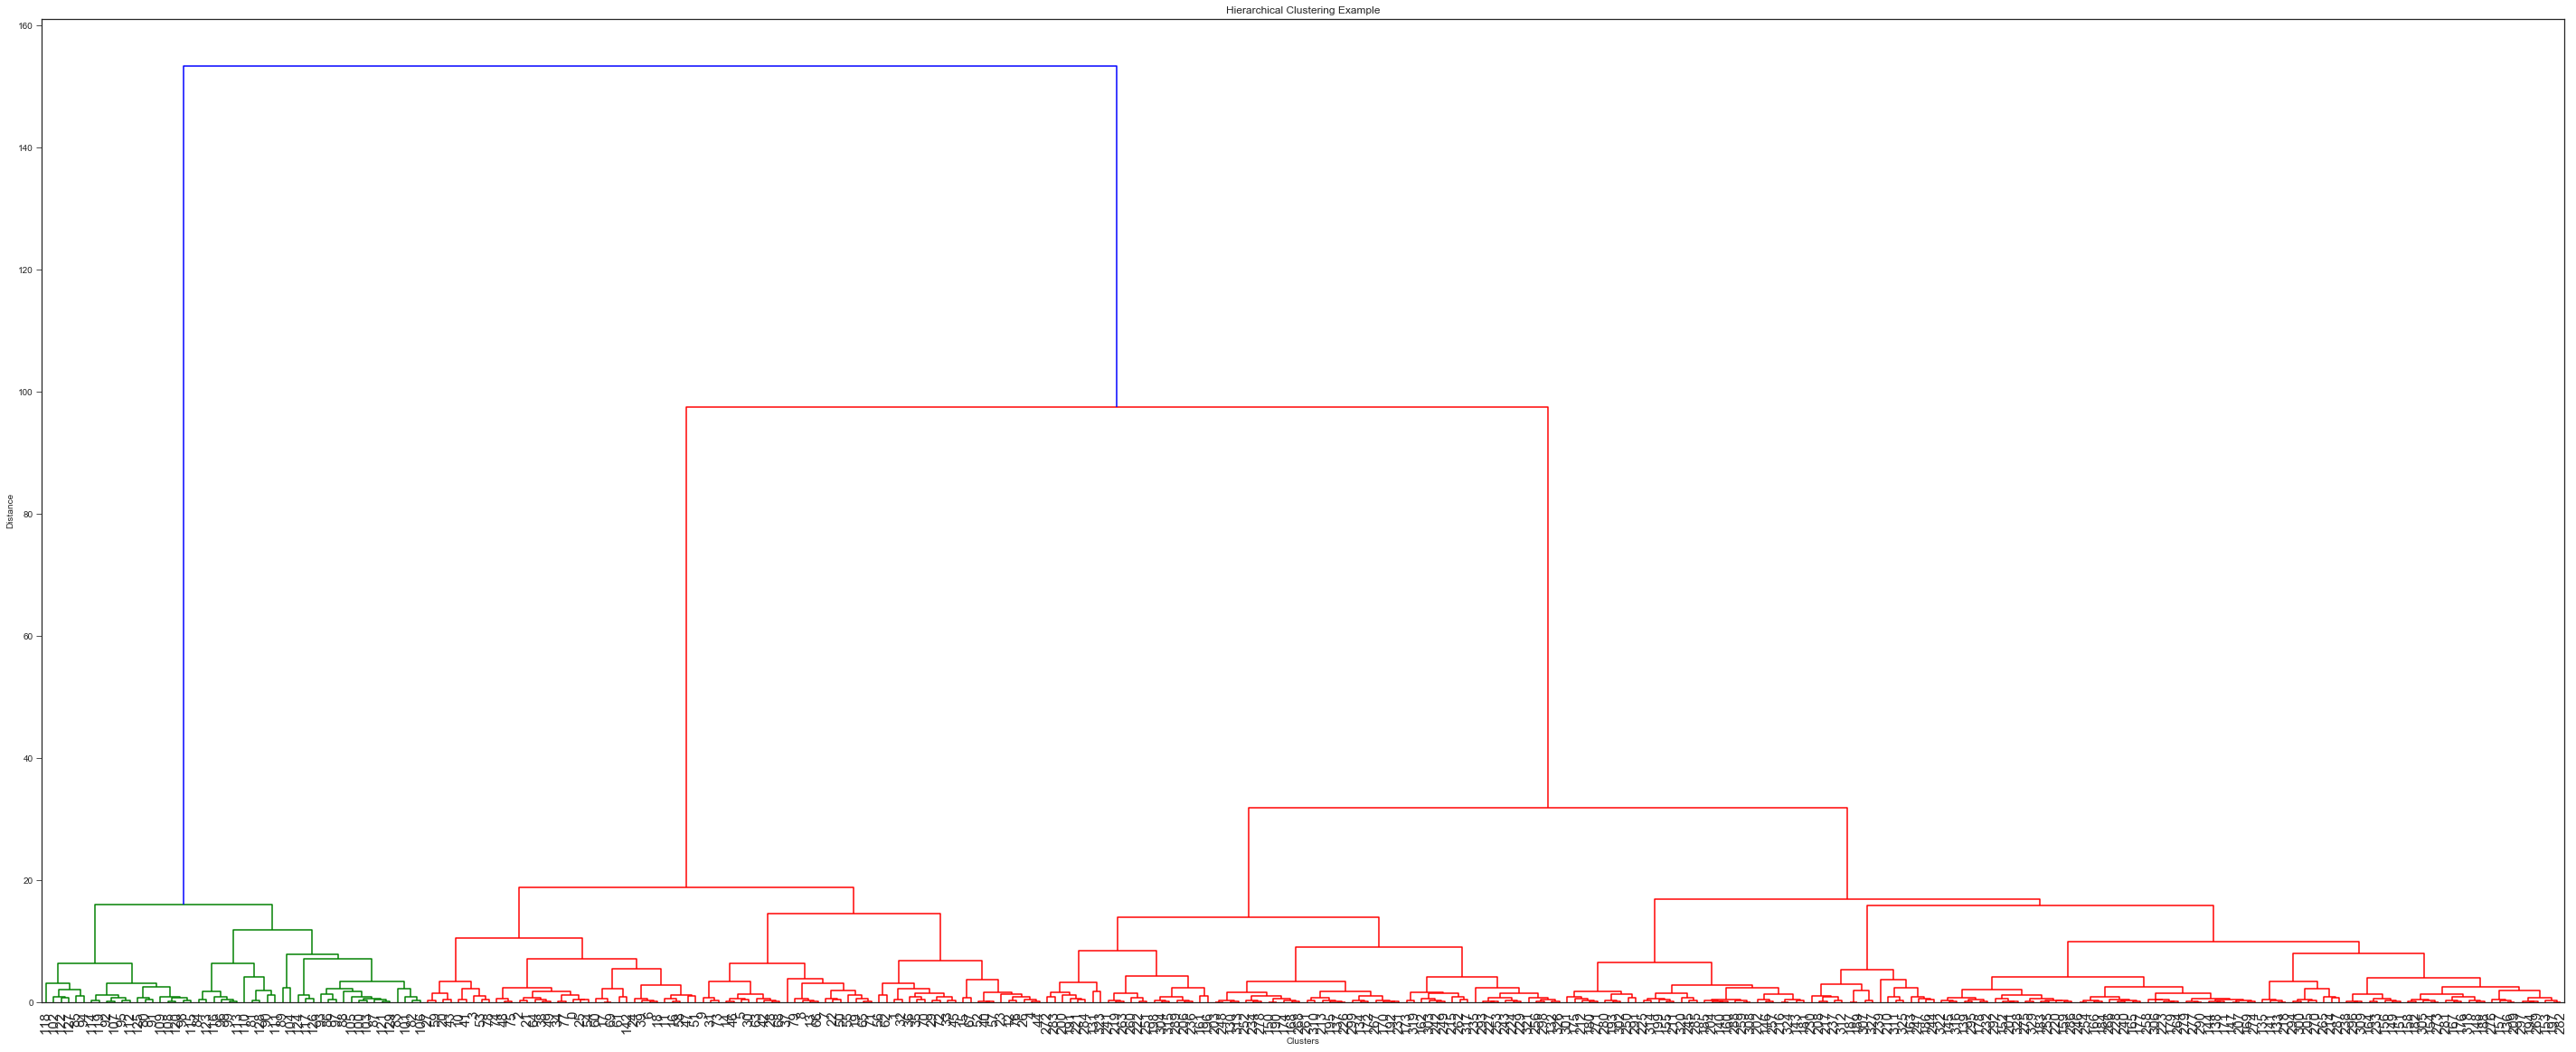

In [363]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='ward')
plt.figure(figsize=(50, 20))
plt.title('Hierarchical Clustering Example')
plt.xlabel('Clusters')
plt.ylabel('Distance')
dendrogram(
    Z,
    #leaf label text rotation
    leaf_rotation=90,
    #leaf label font size
    leaf_font_size=15,
)
plt.show()

## How do we get the cluster labels?
### We cut the tree at a given Y

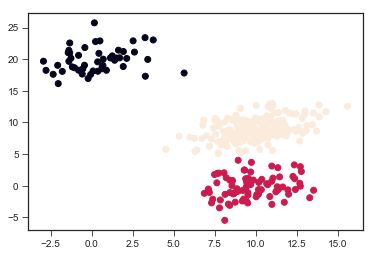

In [368]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

link = linkage (X, method = 'ward')
ran_labels = fcluster(link,50,criterion = 'distance')

plt.scatter(X[:,0], X[:,1], c = ran_labels)
plt.show()

## How do we get the cluster labels for IRIS?
### Exercise

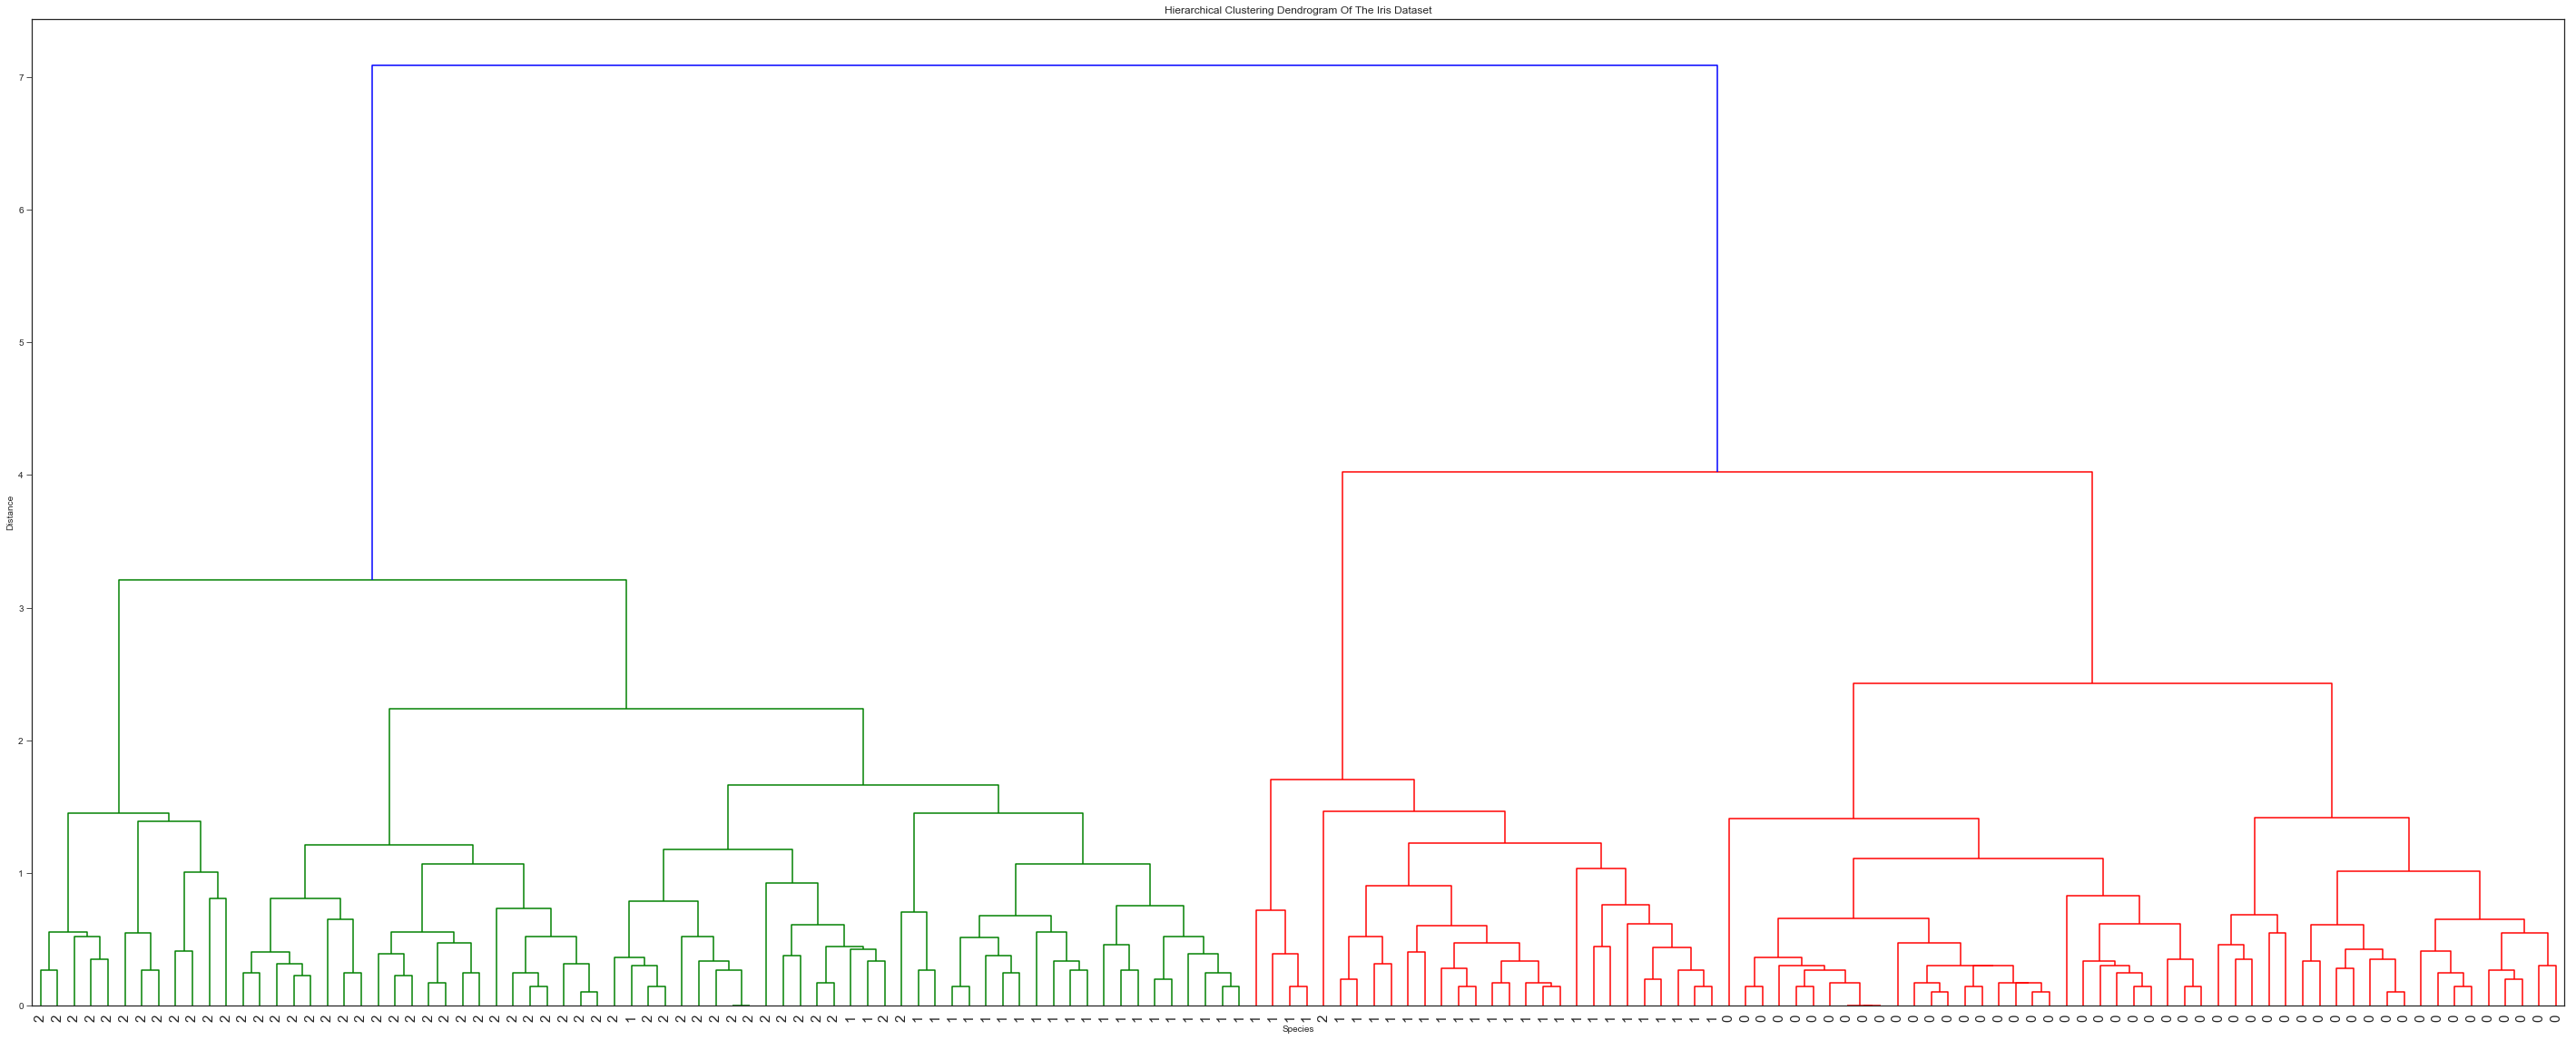

In [326]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(iris.data, method='complete')
plt.figure(figsize=(50, 20))
plt.title('Hierarchical Clustering Dendrogram Of The Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram(
    Z,
    labels=iris.target,
    #leaf label text rotation
    leaf_rotation=90,
    #leaf label font size
    leaf_font_size=15,
)
plt.show()

## Let's do a simple agglomerative clustering by hand
### Exercise

In [372]:
my_df = pd.DataFrame({"Name":['A','B','C','D','E','F'], "X":[4.2,4,2.5,3,3,3.8],"Y":[4,5,2,3.7,4,4.5]})
my_df

,Name,X,Y
0,A,4.2,4.0
1,B,4.0,5.0
2,C,2.5,2.0
3,D,3.0,3.7
4,E,3.0,4.0
5,F,3.8,4.5


In [376]:
from scipy.spatial.distance import squareform, pdist
distance = pd.DataFrame(squareform(pdist(my_df.iloc[:, 1:])), columns=my_df.Name.unique(), index=my_df.Name.unique())
round(distance,1)

,A,B,C,D,E,F
A,0.0,1.0,2.6,1.2,1.2,0.6
B,1.0,0.0,3.4,1.6,1.4,0.5
C,2.6,3.4,0.0,1.8,2.1,2.8
D,1.2,1.6,1.8,0.0,0.3,1.1
E,1.2,1.4,2.1,0.3,0.0,0.9
F,0.6,0.5,2.8,1.1,0.9,0.0


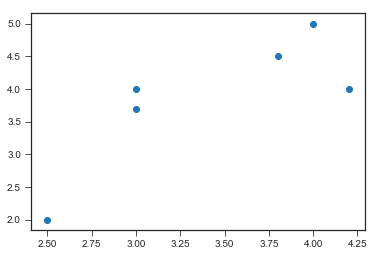

In [383]:
x = my_df.X
y = my_df.Y
plt.scatter(x,y)
plt.show()

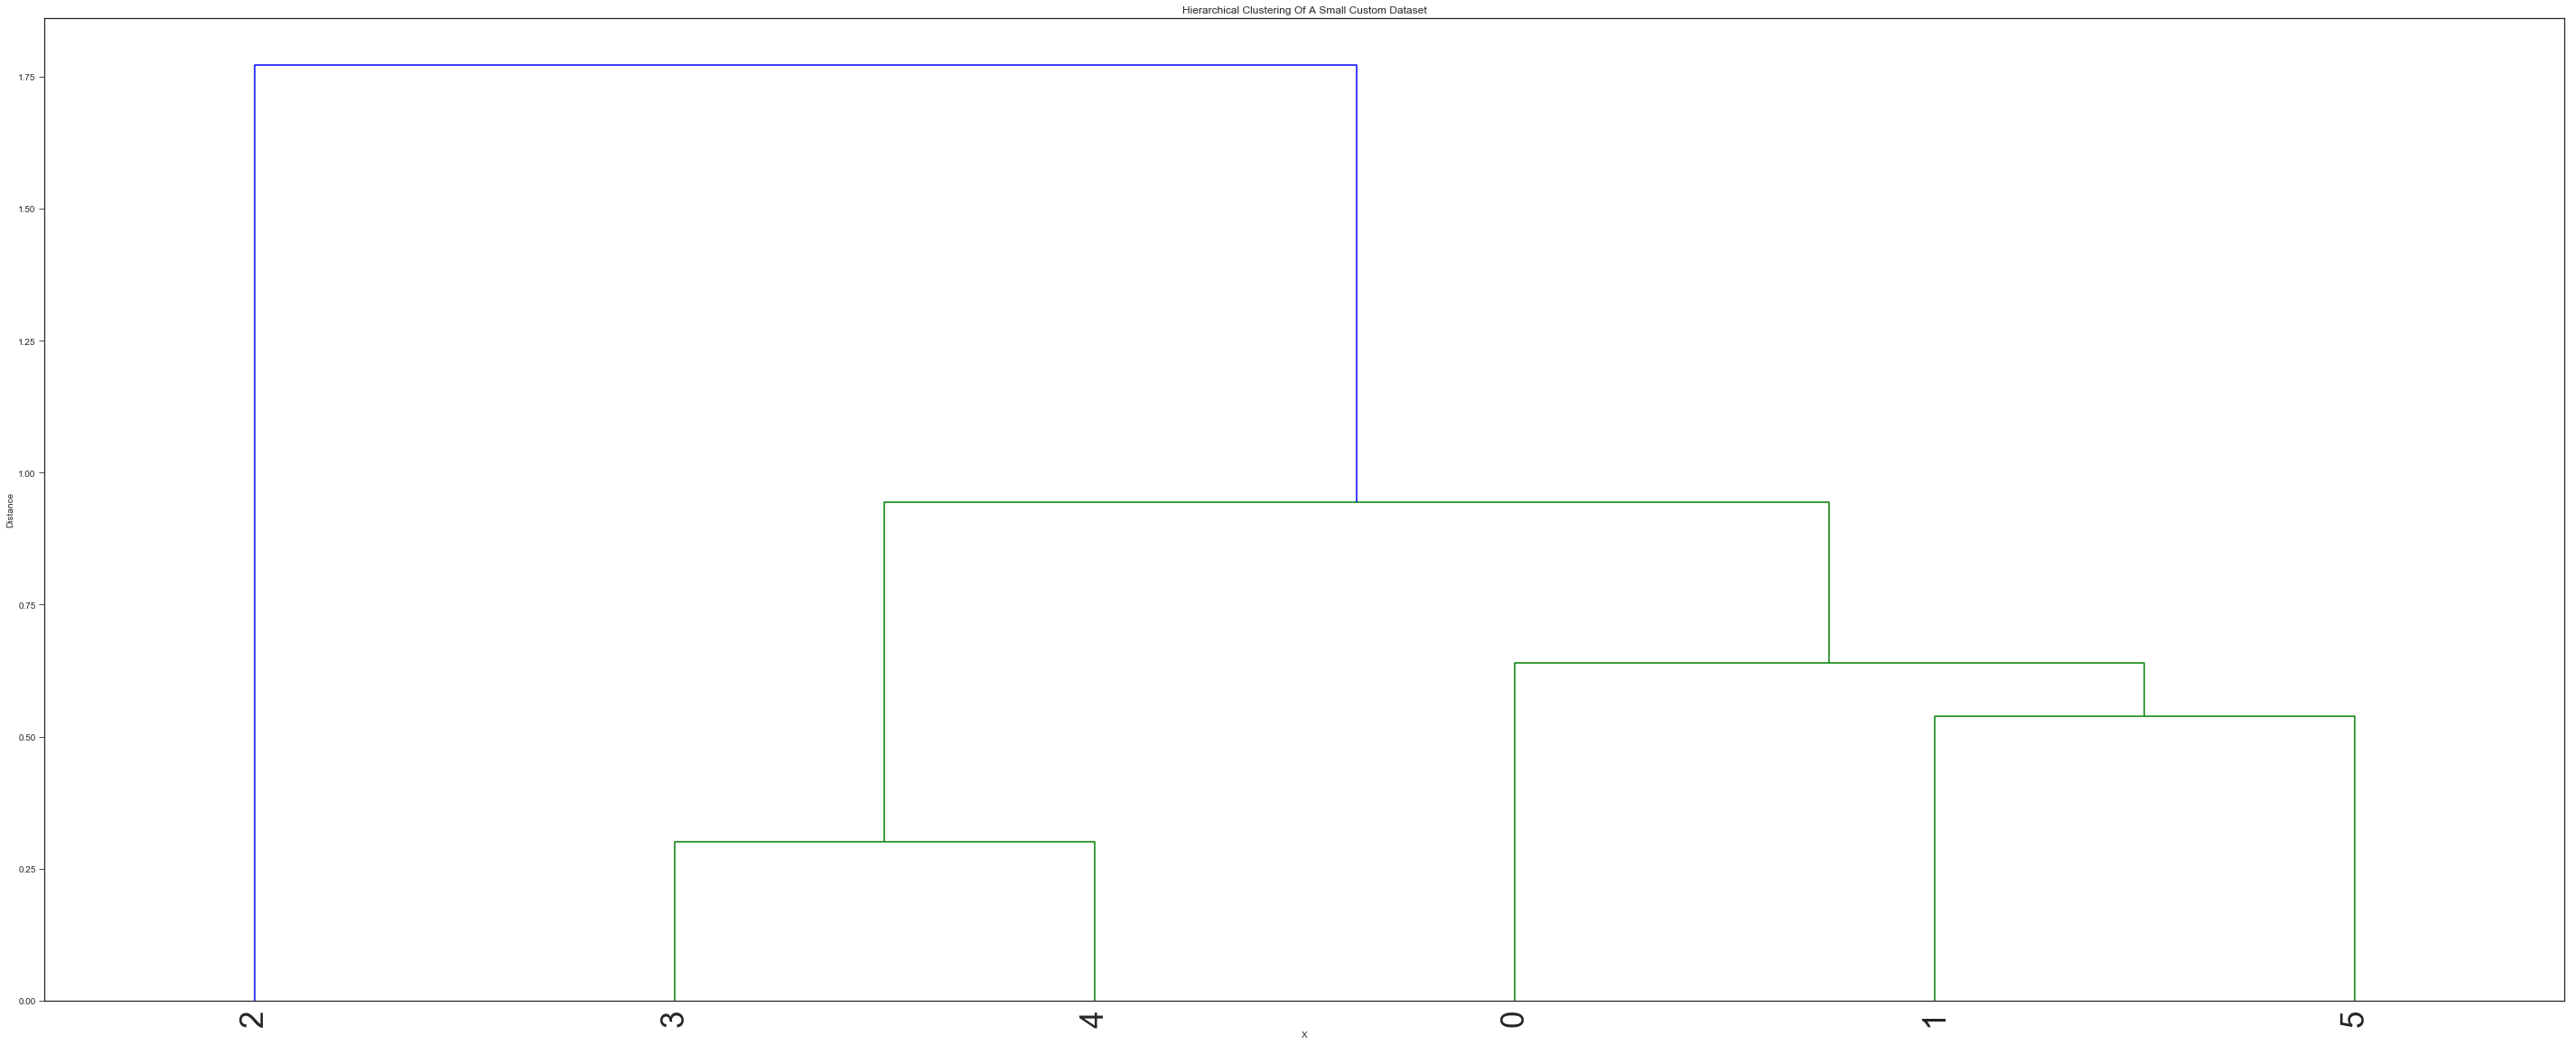

In [388]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(my_df[['X', 'Y']].values)
plt.figure(figsize=(50, 20))
plt.title('Hierarchical Clustering Of A Small Custom Dataset')
plt.xlabel('X')
plt.ylabel('Distance')
dendrogram(
    Z,
    #leaf label text rotation
    leaf_rotation=90,
    #leaf label font size
    leaf_font_size=35,
)
plt.show()

In [327]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_iris
iris = load_iris()

In [274]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### How many groups of data can you identify?

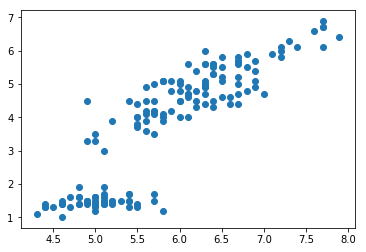

In [18]:
x = iris.data[:,0]
y = iris.data[:,2]
plt.scatter(x,y)
plt.show()

### Let's use the labels to color the points?  Domain knowledge is valuable

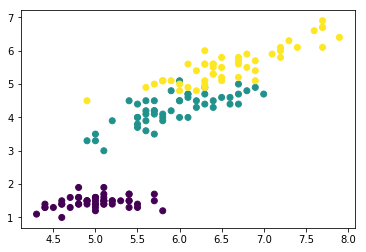

In [19]:
plt.scatter(x,y, c = iris.target)
plt.show()

In [27]:
#import the model
from sklearn.cluster import KMeans
#instantiate the model and specify number of clusters
km = KMeans(n_clusters = 3, algorithm = "auto")
#fit the model on the IRIS data
km.fit(iris.data)

#find the clusters and assign each data to a cluster
labels = km.predict(iris.data)
print (labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


* When we train the model Kmeans remembers the centroids of the cluster.
* Thus, new points can be easily and quickly assigned to existing clusters


In [21]:
new_measurement = [[5.4,4.3,1.3,1]]
new_label = km.predict(new_measurement)
print(new_label)

[1]


[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


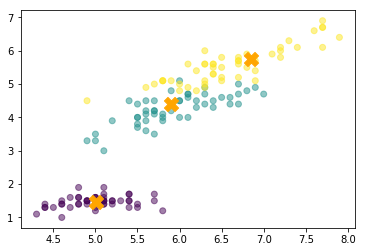

In [39]:
#First let's work on creating our scatter plot
plt.scatter(x,y, c = iris.target, alpha = 0.5)

#We assign the cluster centers
centroids = km.cluster_centers_.squeeze()
print (centroids)
#Assign the centroid columns, note there are 4, we are plotting 2
c_x = centroids[:,0]
c_y = centroids[:,2]

#Make a scatter plot of the centroids
plt.scatter(c_x,c_y, marker='X', s = 200,color='orange')
plt.show()

#Note: The EM algorithm is described in nice detail in Alan's video Lecture 10 [ Pages > Canvas]

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


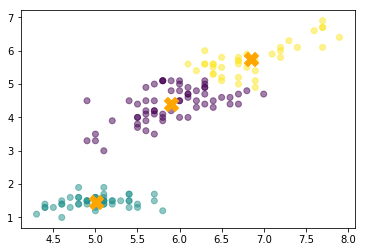

In [40]:
#Note the code is the same but I changed c = labels to show the CLUSTER labels instead of the real labels
#Here is our scatter plot with the clusters labels
plt.scatter(x,y, c = labels, alpha = 0.5)

#We assign the cluster centers
centroids = km.cluster_centers_.squeeze()
print (centroids)
#Assign the centroid columns, note there are 4, we are plotting 2
c_x = centroids[:,0]
c_y = centroids[:,2]

#Make a scatter plot of the centroids, type, size, color of centroid markers
plt.scatter(c_x,c_y, marker='X', s = 200,color='orange')
plt.show()

### To visualize better we can make a side by side figure

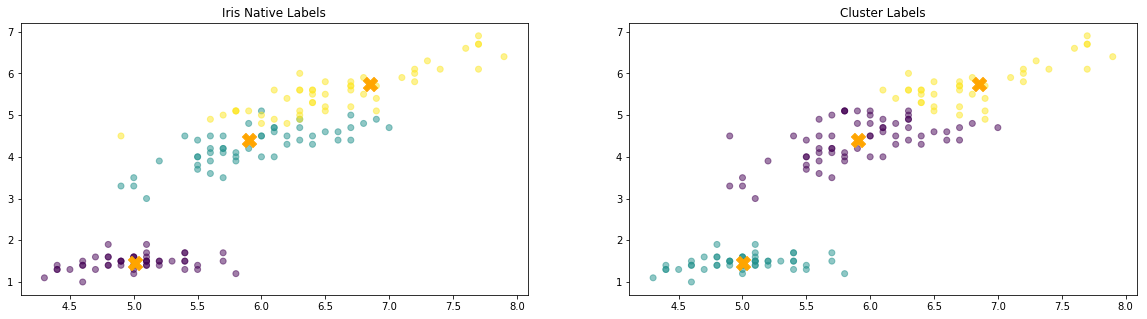

In [45]:
#This defines the width and height of your figure (try it without this line)
plt.figure(figsize=(20, 5))

#one row, two columns, we are at column one (this is 1,2,1)
plt.subplot(1,2,1)
plt.scatter(x,y, c = iris.target, alpha = 0.5)
plt.title('Iris Native Labels')

centroids = km.cluster_centers_.squeeze()
c_x = centroids[:,0]
c_y = centroids[:,2]
plt.scatter(c_x,c_y, marker='X', s = 200,color='orange')

plt.subplot(1,2,2)
plt.scatter(x,y, c = labels, alpha = 0.5)
plt.title('Cluster Labels')

centroids = km.cluster_centers_.squeeze()
c_x = centroids[:,0]
c_y = centroids[:,2]
plt.scatter(c_x,c_y, marker='X', s = 200,color='orange')



plt.show()


## Visualization is great, but it's not quantitative
### Cross-tabulation

In [69]:
df_eval = pd.DataFrame({"cluster":labels,"native":iris.target})
ct = pd.crosstab(df_eval['cluster'],df_eval['native'])
ct.columns = ["Setosa","Versicolor","Virginica"]
ct

,Setosa,Versicolor,Virginica
cluster,,,
0,0,48,14
1,50,0,0
2,0,2,36


### We can express this in percent as well

In [68]:
df_eval = pd.DataFrame({"cluster":labels,"native":iris.target})
ct = pd.crosstab(df_eval['cluster'],df_eval['native']).apply(lambda x: round((x/x.sum()*100),1), axis=1)
ct.columns = ["Setosa","Versicolor","Virginica"]
ct

,Setosa,Versicolor,Virginica
cluster,,,
0,0.0,77.4,22.6
1,100.0,0.0,0.0
2,0.0,5.3,94.7


### Built-in normalization

In [81]:
df_eval = pd.DataFrame({"cluster":labels,"native":iris.target})
#You can normalize by index, all, columns
ct = pd.crosstab(df_eval['cluster'],df_eval['native'],normalize='index')
#df can be multiplied by a scalar
ct*=100
ct.columns = ["Setosa","Versicolor","Virginica"]
#df can be rounded
ct.round(1)

,Setosa,Versicolor,Virginica
cluster,,,
0,0.0,77.4,22.6
1,100.0,0.0,0.0
2,0.0,5.3,94.7


### This is great, but what if you don't have any labels?
## Inertia

* It's a measure of the spread of a cluster (within cluster sum of squares)
* The less spread the better
* Lower inertia value means a better cluster
* Inertia =∑i(d(i,centroid)) and this is what Kmeans tries to minimize

In [84]:
round(km.inertia_,2)

78.94

### Let's see how inertia varies with k going from 1-8

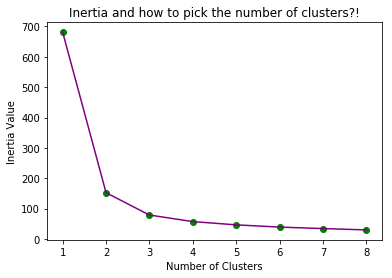

In [114]:
inertias = []

for i in range(1,9):
    km = KMeans(n_clusters = i, algorithm = "auto")
    km.fit(iris.data)
    inertias.append(round(km.inertia_,2))
inertias

n_clust = range(1,9)

plt.scatter(n_clust,inertias, color = "green")
plt.plot(n_clust, inertias, color = "purple")
#Plot Labels
plt.title("Inertia and how to pick the number of clusters?!")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Value")
plt.show()
    

### Feature engineering of numerical data: Scaling
#### KMeans failure and Variance Dependence 

In [190]:
from sklearn.datasets import load_wine
wine = load_wine()
print (wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [153]:
#I will change the target_names to something more fun than classes
#Between the 3 you should go for Barolo :) 
wine.target_names = ["Barolo", "Grignolino", "Barbera"]
wine.target_names

['Barolo', 'Grignolino', 'Barbera']

In [154]:
#Let's create a dataframe and do some visualizations
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names)
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0


### Let's take a look at the boxplots

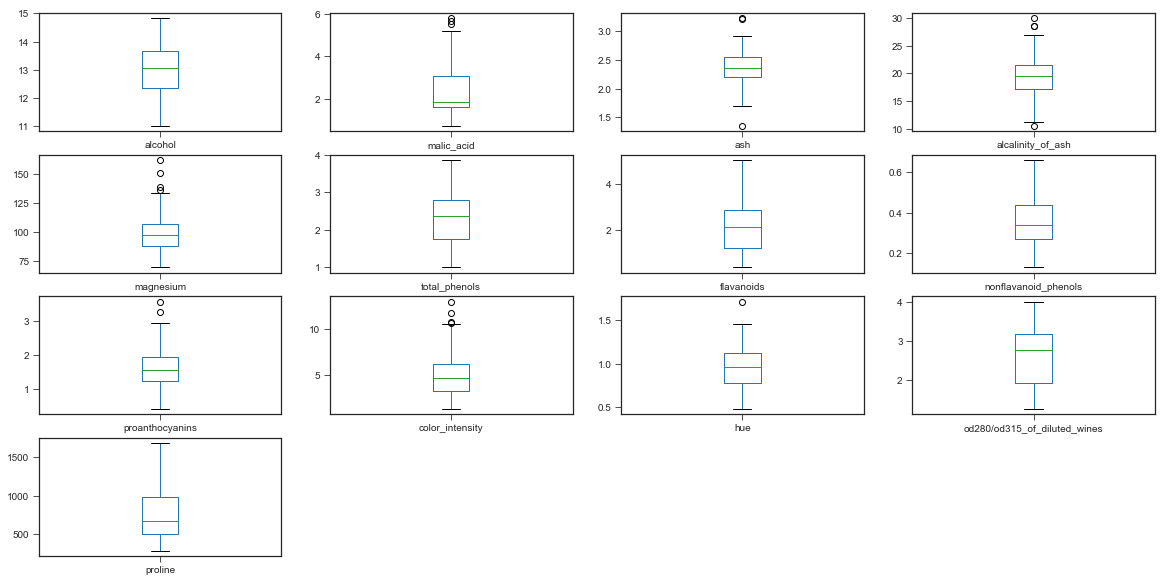

In [158]:
df_wine.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(20,10));

### Even better with Seaborn violin plots

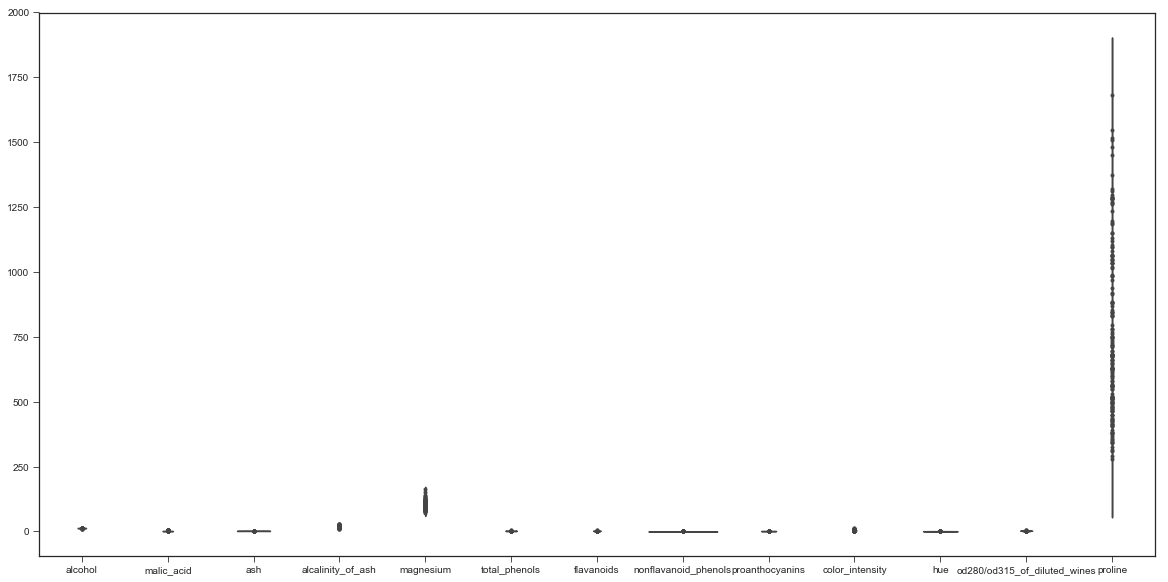

In [157]:
#df_wine.drop('magnesium', axis=1, inplace=True)
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.violinplot(data=df_wine, inner="points", ax=ax)

### How will proline affect our Kmeans clustering?

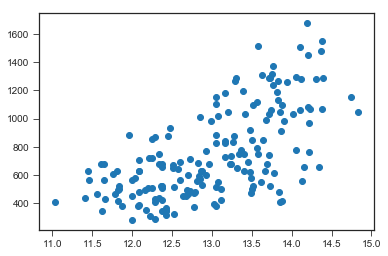

In [173]:
x = wine.data[:,0]
y = wine.data[:,12]
plt.scatter(x,y)
plt.show()

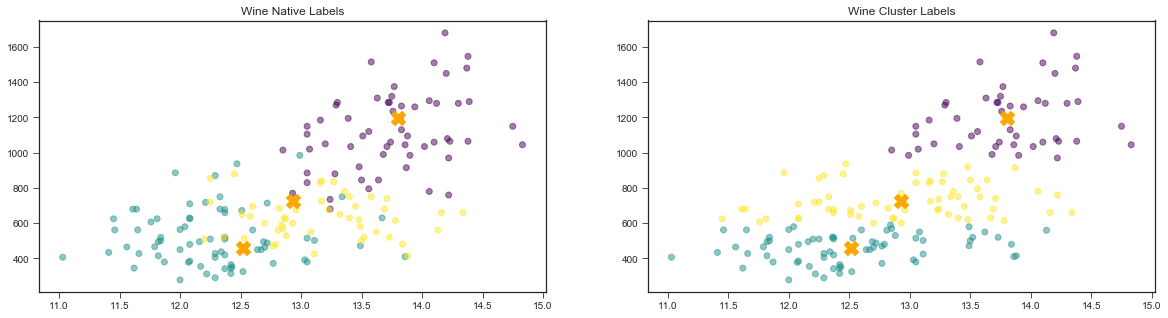

In [226]:
#import the model
from sklearn.cluster import KMeans
#instantiate the model and specify number of clusters
kmw = KMeans(n_clusters = 3)
#fit the model and find the clusters and assign each data to a cluster
wlabels = kmw.fit_predict(wine.data)

#This defines the width and height of your figure (try it without this line)
plt.figure(figsize=(20, 5))

#one row, two columns, we are at column one (this is 1,2,1)
plt.subplot(1,2,1)
plt.scatter(x,y, c = wine.target, alpha = 0.5, cmap='viridis')
plt.title('Wine Native Labels')

centroids = kmw.cluster_centers_
c_x = centroids[:,0]
c_y = centroids[:,12]
plt.scatter(c_x,c_y, marker='X', s = 200,color='orange')

plt.subplot(1,2,2)
plt.scatter(x,y, c = wlabels, alpha = 0.5, cmap='viridis')
plt.title('Wine Cluster Labels')

centroids = kmw.cluster_centers_
c_x = centroids[:,0]
c_y = centroids[:,12]
plt.scatter(c_x,c_y, marker='X', s = 200,color='orange',cmap = 'viridis')
plt.show()
#note you may get different colors on the right plot as centroids may be assigned either 0,1, or 2
#You can rerun this cell several times to get to the right colors on plot 122

### Crosstabulation
#### Not that great

In [228]:
df_wine_eval = pd.DataFrame({"cluster":wlabels,"native":wine.target})
ctw = pd.crosstab(df_wine_eval['cluster'],df_wine_eval['native'])
ctw.columns = ["Barolo", "Grignolino", "Barbera"]
ctw

,Barolo,Grignolino,Barbera
cluster,,,
0,46,1,0
1,0,50,19
2,13,20,29


### Crosstabulation after StandardScaler

### Goal: Transform the data so it has a mean = 0 and variance = 1
#### StandardScaler feature engineering

In [231]:
#import the scaler
from sklearn.preprocessing import StandardScaler
#instantiate the scaler
sc = StandardScaler()
sc.fit(wine.data)
scaled_wine_data = sc.transform(wine.data)
scaled_wine_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### Evaluating the performance of KMeans with Scaled Features
#### Better?

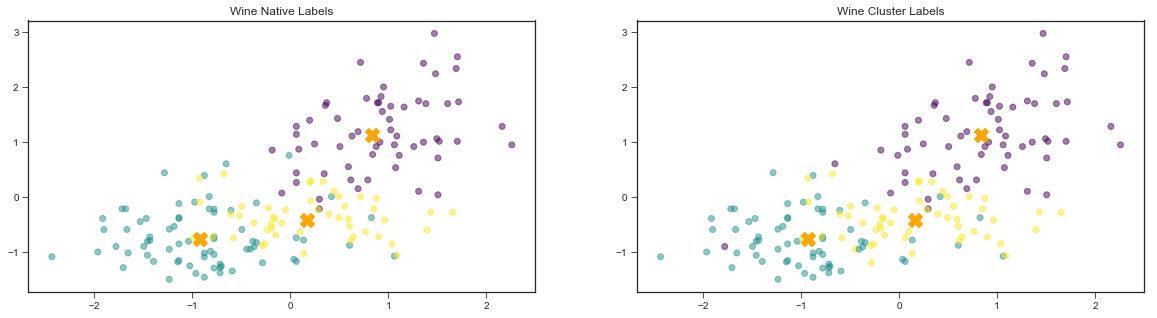

In [255]:
x = scaled_wine_data[:,0]
y = scaled_wine_data[:,12]
#import the model
from sklearn.cluster import KMeans
#instantiate the model and specify number of clusters
kmw = KMeans(n_clusters = 3)
#fit the model and find the clusters and assign each data to a cluster
swlabels = kmw.fit_predict(scaled_wine_data)

#This defines the width and height of your figure (try it without this line)
plt.figure(figsize=(20, 5))

#one row, two columns, we are at column one (this is 1,2,1)
plt.subplot(1,2,1)
plt.scatter(x,y, c = wine.target, alpha = 0.5, cmap='viridis')
plt.title('Wine Native Labels')

centroids = kmw.cluster_centers_
c_x = centroids[:,0]
c_y = centroids[:,12]
plt.scatter(c_x,c_y, marker='X', s = 200,color='orange')

plt.subplot(1,2,2)
plt.scatter(x,y, c = swlabels, alpha = 0.5, cmap='viridis')
plt.title('Wine Cluster Labels')

centroids = kmw.cluster_centers_
c_x = centroids[:,0]
c_y = centroids[:,12]
plt.scatter(c_x,c_y, marker='X', s = 200,color='orange',cmap = 'viridis')
plt.show()
#note you may get different colors on the right plot as centroids may be assigned either 0,1, or 2
#You can rerun this cell several times to get to the right colors on plot 122

### Seaborn violin plots after Standard Scaler
#### The bigger the variance the larger the impact

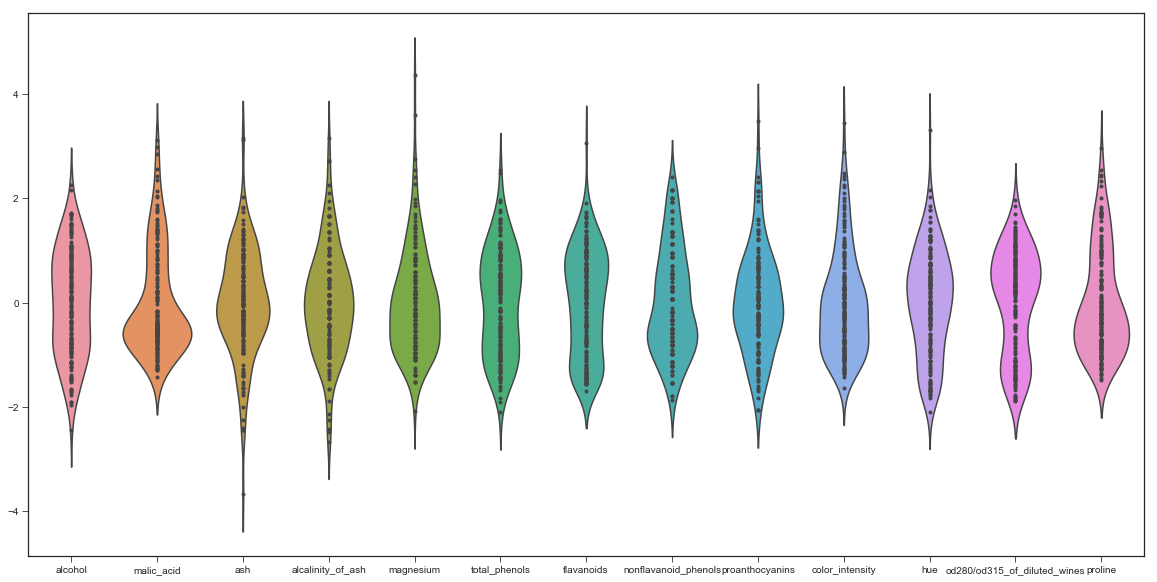

In [260]:
#Let's create a dataframe and do some visualizations
scaled_df_wine = pd.DataFrame(scaled_wine_data, columns = wine.feature_names)
df_wine
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.violinplot(data=scaled_df_wine, inner="points", ax=ax)

### Crosstabulation after StandardScaler

In [256]:
df_sc_wine_eval = pd.DataFrame({"cluster":swlabels,"native":wine.target})
sctw = pd.crosstab(df_sc_wine_eval['cluster'],df_wine_eval['native'])
sctw.columns = ["Barolo", "Grignolino", "Barbera"]
sctw

,Barolo,Grignolino,Barbera
cluster,,,
0,59,3,0
1,0,65,0
2,0,3,48


In [257]:
df_wine_eval = pd.DataFrame({"cluster":wlabels,"native":wine.target})
ctw = pd.crosstab(df_wine_eval['cluster'],df_wine_eval['native'])
ctw.columns = ["Barolo", "Grignolino", "Barbera"]
ctw

,Barolo,Grignolino,Barbera
cluster,,,
0,46,1,0
1,0,50,19
2,13,20,29


### Scikit Pipelines with make_pipeline

* We don't have to do step by step we can link our transformation to our model
* In fact this is how we can link various models etc.

https://stackoverflow.com/questions/40708077/what-is-the-difference-between-pipeline-and-make-pipeline-in-scikit

* A more complex pipeline example

http://www.marcosantoni.com/2016/06/19/a-simple-machine-learning-pipeline.html



<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_11/images/lecture_11.001.jpeg?raw=true"> </center>

<center><img style="align: center;"  src="https://github.com/sunworshipper/e29/blob/master/Lecture_11/images/lecture_11.002.jpeg?raw=true"> </center>

In [265]:
#load
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
#instantiate
sc = StandardScaler()
km = KMeans(n_clusters = 3)
pipeline = make_pipeline(sc,km)
#fit
pipeline.fit(wine.data)
#predict
pip_labels = pipeline.predict(wine.data)
pip_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)